<a href="https://colab.research.google.com/github/Gabril0/CNN/blob/main/Attention_UNET_Oral_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Summary of the model studied
The model studied focus mainly in providing an U-NET with a good and robust data augmentation to avoid pitfalls and enhance the learning capabilities.

In [ ]:
#downloading the dataset
!wget https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/9bsc36jyrt-1.zip

--2024-03-05 11:59:15--  https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/9bsc36jyrt-1.zip
Resolving prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)... 52.92.18.10, 3.5.65.113, 3.5.64.47, ...
Connecting to prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)|52.92.18.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1081025712 (1.0G) [application/zip]
Saving to: ‘9bsc36jyrt-1.zip’

9bsc36jyrt-1.zip    100%[===================>]   1.01G  33.0MB/s    in 32s     

2024-03-05 11:59:48 (32.3 MB/s) - ‘9bsc36jyrt-1.zip’ saved [1081025712/1081025712]



In [ ]:
#unzipping
!unzip /content/9bsc36jyrt-1.zip
!rm -r "/content/9bsc36jyrt-1.zip"

Archive:  /content/9bsc36jyrt-1.zip
  inflating: H&E-stained oral squamous cell carcinoma histological images dataset/MendeleyData_OCDC_2022.pdf  
  inflating: H&E-stained oral squamous cell carcinoma histological images dataset/training/tumor/patch/640x640/1009009/1009009_1.png  
  inflating: H&E-stained oral squamous cell carcinoma histological images dataset/training/tumor/patch/640x640/1009009/1009009_2.png  
  inflating: H&E-stained oral squamous cell carcinoma histological images dataset/training/tumor/patch/640x640/1009009/1009009_3.png  
  inflating: H&E-stained oral squamous cell carcinoma histological images dataset/training/tumor/patch/640x640/1009009/1009009_5.png  
  inflating: H&E-stained oral squamous cell carcinoma histological images dataset/training/tumor/patch/640x640/1009010x1000902/1009010x1000902_1.png  
  inflating: H&E-stained oral squamous cell carcinoma histological images dataset/training/tumor/patch/640x640/1009010x1000902/1009010x1000902_5.png  
  inflating

In [ ]:
#imports
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#getting path references
#training used only the roi folders

testing_folder1 = "/content/H&E-stained oral squamous cell carcinoma histological images dataset/testing/tumor/patch/640x640/1009009/01-roi"
testing_folder2 = "/content/H&E-stained oral squamous cell carcinoma histological images dataset/testing/tumor/patch/640x640/1009010x1000902/01-roi"
testing_folder3 = "/content/H&E-stained oral squamous cell carcinoma histological images dataset/testing/tumor/patch/640x640/1009011/01-roi"
testing_folder4 = "/content/H&E-stained oral squamous cell carcinoma histological images dataset/testing/tumor/patch/640x640/1009014/01-roi"
testing_folder5 = "/content/H&E-stained oral squamous cell carcinoma histological images dataset/testing/tumor/patch/640x640/1009016x1000903/01-roi"
testing_folder6 = "/content/H&E-stained oral squamous cell carcinoma histological images dataset/testing/tumor/patch/640x640/1009023/01-roi"

training_folder1 = "/content/H&E-stained oral squamous cell carcinoma histological images dataset/training/tumor/patch/640x640/1009009/01-roi"
training_folder2 = "/content/H&E-stained oral squamous cell carcinoma histological images dataset/training/tumor/patch/640x640/1009010x1000902/01-roi"
training_folder3 = "/content/H&E-stained oral squamous cell carcinoma histological images dataset/training/tumor/patch/640x640/1009011/01-roi"
training_folder4 = "/content/H&E-stained oral squamous cell carcinoma histological images dataset/training/tumor/patch/640x640/1009014/01-roi"
training_folder5 = "/content/H&E-stained oral squamous cell carcinoma histological images dataset/training/tumor/patch/640x640/1009016x1000903/01-roi"
training_folder6 = "/content/H&E-stained oral squamous cell carcinoma histological images dataset/training/tumor/patch/640x640/1009023/01-roi"

training_folders = [training_folder1, training_folder2, training_folder3, training_folder4, training_folder5, training_folder6]
#the mask folders will be added dinamically
testing_folders = [testing_folder1, testing_folder2, testing_folder3, testing_folder4, testing_folder5, testing_folder6]

training_path = []
mask_path = []
test_path = []
test_mask_path = []


def append_paths(folder, pathList, complementaryPath):
    full_path = os.path.join(folder, complementaryPath)
    if os.path.isdir(full_path):
        for file in os.listdir(full_path):
            if file.endswith(".png"):
                pathList.append(os.path.join(full_path, file))
            else:
                print("error in file " + file)
    else:
        print("error: " + full_path + " could not be found")

for folder in training_folders: #appending the paths for the original images and respective masks
  append_paths(folder,training_path,"01-original")
  append_paths(folder,mask_path,"02-mask")

for folder in testing_folders: #appending the paths for the test images
  append_paths(folder,test_path,"01-original")
  append_paths(folder,test_mask_path,"02-mask")


In [ ]:
#transforming into numpy array

def path_to_array(path, numpyArray):
  for file in path:
    image = plt.imread(file)
    image_array = np.array(image)
    numpyArray.append(image_array)

training_array = []
mask_array = []
test_array = []
test_mask_array = []

path_to_array(training_path, training_array)
path_to_array(mask_path, mask_array)
path_to_array(test_path, test_array)
path_to_array(test_mask_path, test_mask_array)


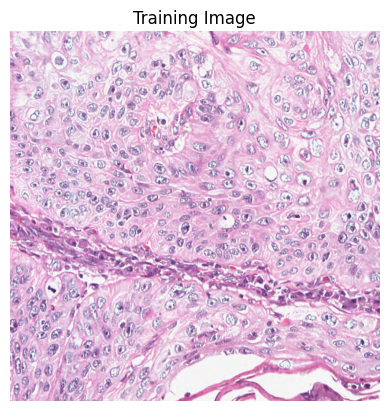

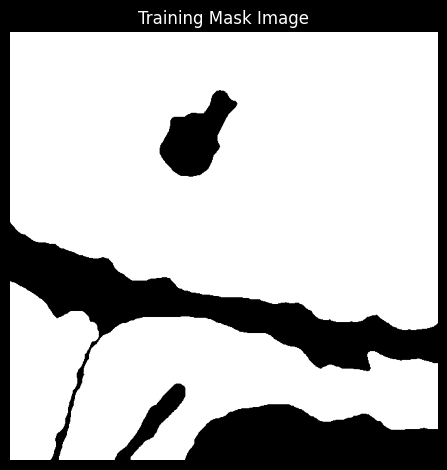

In [ ]:
#showing an image
plt.imshow(training_array[1])
plt.title('Training Image')
plt.axis('off')

plt.figure(facecolor='black')
plt.imshow(mask_array[1])
plt.title('Training Mask Image',color="white")
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#do data augmentation horizontal flip, vertical flip, rotation, transpose, grid distortion,
#optical distortion, color transfer, inpainting

In [ ]:
#do accuracy, precision, F1, IOU, Sensitivity, Specificity